In [29]:
import numpy as np
import pandas as pd
from sklearn import preprocessing as pp
import math
import matplotlib.pyplot as plt

In [30]:
data = pd.DataFrame([
    [1,0,0,1,3,0,1,1,0,1],
    [1,0,0,2,1,0,0,3,2,0],
    [0,1,0,1,1,0,0,0,0,1],
    [1,0,1,2,1,1,0,3,1,1],
    [1,0,1,2,3,0,1,1,3,0],
    [0,1,0,1,2,1,1,2,0,1],
    [0,1,0,0,1,1,0,0,0,0],
    [0,0,0,1,2,1,1,3,0,1],
    [0,1,1,2,1,1,0,0,3,0],
    [1,1,1,2,3,0,1,2,1,0],
    [0,0,0,0,1,0,0,3,0,0],
    [1,1,1,2,1,0,0,0,2,1]],
    columns=['Alt','Bar','Fri','Pat','Price','Rain','Res','Type','Est','WillWait']
)

/Users/adamnoack/anaconda/envs/hack/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Step: 0 Loss: 0.264482

Step: 1 Loss: 0.255006

Step: 2 Loss: 0.250437

Step: 3 Loss: 0.269140

Step: 4 Loss: 0.289322

Step: 5 Loss: 0.232567

Step: 6 Loss: 0.216292

Step: 7 Loss: 0.200960

Step: 8 Loss: 0.188598

Step: 9 Loss: 0.193401

Step: 10 Loss: 0.285938

Step: 11 Loss: 0.250430

Step: 12 Loss: 0.207048

Step: 13 Loss: 0.185985

Step: 14 Loss: 0.168131

Step: 15 Loss: 0.156477

Step: 16 Loss: 0.148307

Step: 17 Loss: 0.140482

Step: 18 Loss: 0.131975

Step: 19 Loss: 0.123530

Step: 20 Loss: 0.116432

Step: 21 Loss: 0.110929

Step: 22 Loss: 0.110831

Step: 23 Loss: 0.187087

Step: 24 Loss: 0.447039

Step: 25 Loss: 0.314137

Step: 26 Loss: 0.160483

Step: 27 Loss: 0.136682

Step: 28 Loss: 0.125887

Step: 29 Loss: 0.116189

Step: 30 Loss: 0.105896

Step: 31 Loss: 0.097948

Step: 32 Loss: 0.092943

Step: 33 Loss: 0.089237

Step: 34 Loss: 0.086060

Step: 35 Loss: 0.083171

Step: 36 Loss: 0.080521

Step: 37 Loss: 0.078472

Step: 38 Loss: 0.079530

Step: 39 Loss: 0.097501

Step: 40 L

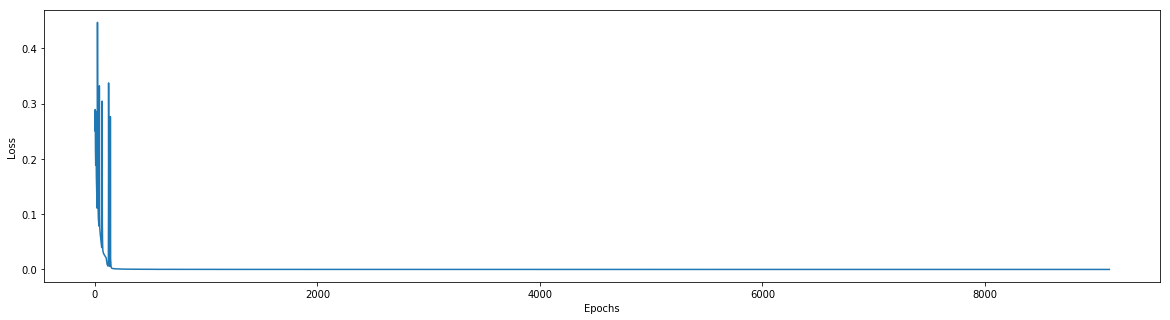

Epochs needed for loss to converge to < 10^-5: 9118


Final weight values:
	W1:[[ 2.19681901 -4.11298447  0.55924335]
 [-2.80123008  0.88157451 -3.17020595]
 [-1.51871554  1.95767609 -0.55903379]
 [ 7.67249645 -6.68538492 -2.8074495 ]
 [-3.80223735  1.81923467  4.3861649 ]
 [ 2.00701763  3.56905921 -7.34007603]
 [ 3.72442774 -4.06044611  1.88995283]
 [-6.38185647 -1.36258599  3.34270071]
 [-7.61592201  3.451336    4.00460177]]
	W2:[[ 14.17219434]
 [ -8.94327895]
 [ -7.79346245]]


In [31]:
class my_nn():
    def __init__(self, data, lr):
        self.lr = lr
        self.X = data.values[:,:-1]
        # scale data appropriately
        min_max_scaler = pp.MinMaxScaler(feature_range=(.1,.9))
        self.X = min_max_scaler.fit_transform(self.X)
#         print(self.X)
        
        self.Y = data.values[:,-1]
#         print(self.Y.shape, self.Y_pred.shape)

        #hardcode weight shapes
        self.W1 = np.random.randn(9, 3) 
        self.W2 = np.random.randn(3, 1)

    def fwd(self):
        self.o1 = np.dot(self.X, self.W1)
        self.g1 = self.sigmoid(self.o1) 
        self.o2 = np.dot(self.g1, self.W2)
        self.Y_pred = self.sigmoid(self.o2)
        return self.Y_pred

    def bprop(self):
        self.Y = np.reshape(self.Y, (12,1))
        self.err = self.Y - self.Y_pred
#         print(self.Y.shape, self.Y_pred.shape)
        self.delt = self.err*self.sig_prime(self.Y_pred)
        self.err2 = np.dot(self.delt, self.W2.T)
        self.delt2 = self.err2*self.sig_prime(self.g1)
    
    def update(self):
        #update the weight values
        self.W1 += self.lr*np.dot(self.X.T, self.delt2)
        self.W2 += self.lr*np.dot(self.g1.T, self.delt)
        
    def loss(self):
        return np.mean(np.square(self.Y - self.fwd()))
        
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))

    def sig_prime(self, x):
        return x * (1 - x)


loss_list = []
nn1 = my_nn(data, 4)
iteration = 0
loss = math.inf
while loss > 10**(-5):
    loss = nn1.loss()
    loss_list.append(loss)
    print("Step: {} Loss: {:.6f}\n".format(iteration, loss)) # mean sum squared loss
    nn1.fwd()
    nn1.bprop()
    nn1.update()
    iteration += 1

plt.figure(figsize=(20,5))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(loss_list)
plt.show()
print("Epochs needed for loss to converge to < 10^-5: {}".format(iteration))
print("\n\nFinal weight values:\n\tW1:{}\n\tW2:{}".format(nn1.W1, nn1.W2))